<a href="https://colab.research.google.com/github/nagamamo/financial_data_science/blob/main/5_2_timeseries_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5.2　Prophetによる日経平均株価の予測

以下では、Prophetを用いた株価の予測例を紹介します。ライブラリは、まず数値計算用のpandas、データ取得を目的とするpandas datareader、標本期間を指定するためのdatetime、時系列モデルにベイズ統計を用いるためのstan、そして時系列モデル用のprophet、最後に図表用のライブラリであるmatplotlibを読み込みます。Prophetではベイズ統計を用いることで、新たな情報（データ）が加わる度に、予測時の確率分布を変化させます。

In [2]:
#[1]ライブラリ読み込み
import pandas as pd
import pandas_datareader as data
import datetime
from prophet import Prophet #時系列モデル用ライブラリ
import matplotlib.pyplot as plt

続いて日経平均株価のヒストリカル・データを取得します。今回はpandas_datareaderを用いる際に（）内に直接証券コードを書き込むため、冒頭にティッカーコードは指定しません。

In [3]:
#[2]データ取得
start=datetime.date(2000,1,1)#標本期間を2020年1月1日から
end=datetime.date(2024,4,30)#2024年4月30日までに指定
nikkei=data.DataReader('^NKX','stooq',start=start,end=end).sort_values(by='Date',ascending=True)

Prophetでは変数名を日時＝'ds'、予測する変数＝'y'に指定されています。このため一度、データフレームのインデックス名を一度リセットして日時をdsへ、予測したい変数をｙへ変数名を変更します。

In [4]:
#[3]データフレームの整理
nikkei.reset_index(inplace=True) #prophetの変数定義への変更するためリセット
nikkei = nikkei.rename(columns={'Date': 'ds','Close': 'y'}) #prophetの変数定義への変更

最後のセルでは、一行目で時系列モデルにProphetを使用する指示を与えます。二行目においてヒストリカル・データをフィッティングし、三行目で予測期間を指定します。これらを実施した後、予測結果を保存し、可視化します。

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmoj29r_b/0cm0ext2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmoj29r_b/6d9wqe_v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69156', 'data', 'file=/tmp/tmpmoj29r_b/0cm0ext2.json', 'init=/tmp/tmpmoj29r_b/6d9wqe_v.json', 'output', 'file=/tmp/tmpmoj29r_b/prophet_modelhi15vrk9/prophet_model-20240526073424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


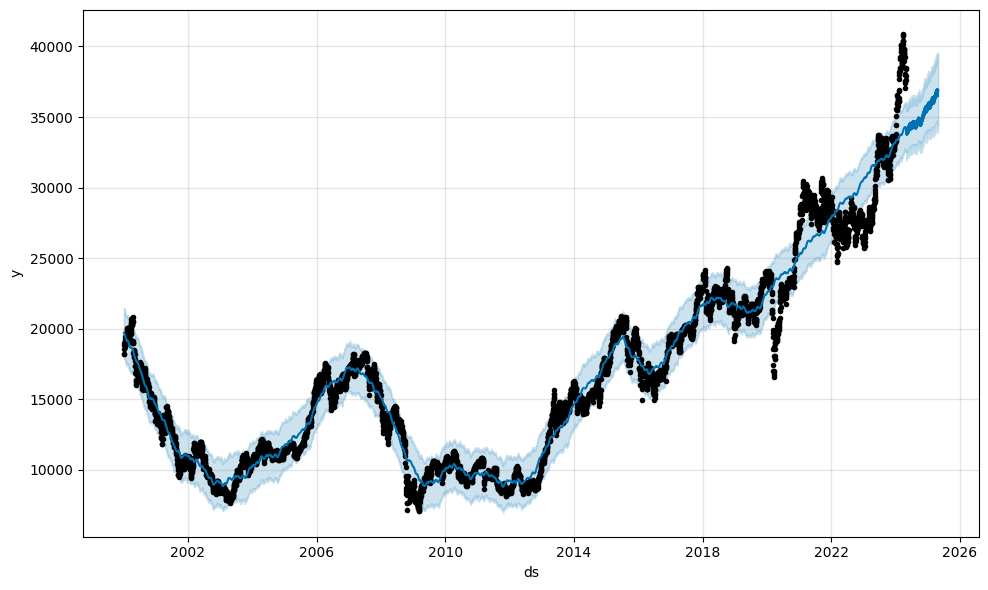

In [7]:
#[4]2025年4月30日の日経平均株価の予測
model = Prophet() #時系列モデルにprophetを採用：モデル名をmodel
model.fit(nikkei) #データを時系列モデルにフィッティング
future = model.make_future_dataframe(periods=365,freq="d") #予測の期間と頻度の定義
forecast = model.predict(future)#予測結果の保存
model.plot(forecast)#可視化
plt.show()

尚、予測結果の各データは下記により取得、保存できます。

In [ ]:
#[5]予測結果のデータ確認
pd.set_option("display.max_rows", len(forecast))
forecast